In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
df = pd.read_csv('crypto_data.csv', index_col=0)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


# Data Preparation

In [5]:
df.IsTrading

42       True
365      True
404      True
611      True
808      True
        ...  
XBC      True
DVTC    False
GIOT    False
OPSC    False
PUNK    False
Name: IsTrading, Length: 1252, dtype: bool

In [6]:
# df[df.IsTrading]

In [7]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded
df2 = df[df.IsTrading]
df2

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
# drop the IsTrading column from the dataframe.
df3 = df2.drop('IsTrading', axis =1)
df3

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Remove all rows that have at least one null value
df3.dropna(inplace=True)
df3

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
df4 = df3[df3['TotalCoinsMined'] > 0]
df4

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Checking if there are any duplicates
df4.duplicated().sum()

0

In [14]:
# In order for our dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
# Delete the CoinName from the original dataframe since the coin names do not contribute to the analysis of the data,
df5=df4.drop('CoinName', axis =1)
df5

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [15]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
df5[["Algorithm", "ProofType"]]

,Algorithm,ProofType
42,Scrypt,PoW/PoS
404,Scrypt,PoW/PoS
1337,X13,PoW/PoS
BTC,SHA-256,PoW
ETH,Ethash,PoW
...,...,...
ZEPH,SHA-256,DPoS
GAP,Scrypt,PoW/PoS
BDX,CryptoNight,PoW
ZEN,Equihash,PoW


In [18]:
# Use Pandas to create dummy variables. 
df6=pd.get_dummies(df5[["Algorithm", "ProofType"]])
df6

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# sorted(df5['Algorithm'].unique())

In [17]:
# df5.merge(df6, on = "index")
df7=df5.join(df6)
df7

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,Scrypt,PoW/PoS,4.199995e+01,42,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,SHA-256,PoW,1.792718e+07,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,Ethash,PoW,1.076842e+08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,Equihash,PoW,7.296538e+06,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df8 = df7.drop(["Algorithm", "ProofType"], axis =1)
df8

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df8)
scaled_data
# scaled_data = StandardScaler().fit_transform(df8)
# print(scaled_data[0:1])

array([[0.00000000e+00, 4.20000000e-11, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06585544e-03, 5.32000000e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.95755135e-02, 3.14159265e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.90135079e-04, 1.40022261e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.37028150e-06, 2.10000000e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.29582282e-07, 1.00000000e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Dimensionality Reduction
 - Preserve about 90% of the explained variance in dimentionality reduction

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [72]:
# Cummulative explained variance is ~0.91.
pca.explained_variance_ratio_.cumsum()

array([0.25723408, 0.42559327, 0.55872537, 0.63216557, 0.67811603,
       0.70153614, 0.72289819, 0.74228303, 0.76008259, 0.77460212,
       0.78806406, 0.80026842, 0.81161185, 0.82270853, 0.83258383,
       0.84088574, 0.84796906, 0.85391636, 0.85900836, 0.86395049,
       0.8688926 , 0.87383472, 0.87876088, 0.88366495, 0.88837692,
       0.89262791, 0.8966581 , 0.90043269])

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50, learning_rate=200)
# , learning_rate=100

In [74]:
X_pca_tsne = tsne.fit_transform(pca_transformed_data)
X_pca_tsne

array([[ 15.305759 , -14.796819 ],
       [ 16.942894 , -11.17486  ],
       [  7.4838767, -15.574708 ],
       ...,
       [-15.717998 ,  -1.6976129],
       [ -7.4337726,   1.6125579],
       [  2.817306 ,   7.991501 ]], dtype=float32)

In [62]:
X_pca_tsne.shape

(532, 2)

- It looks like that there are four possible distinct clusters per below visualization chart.

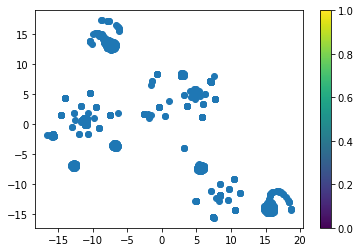

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1])
plt.colorbar()
plt.show()

# Cluster Analysis with k-Means


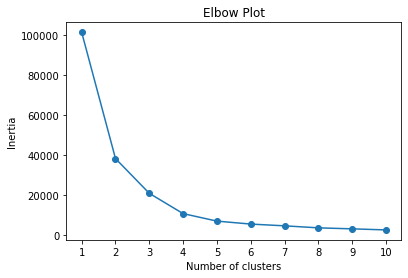

In [76]:
# Perform KMeans on the pca'd tsne'd features of X
from sklearn.cluster import KMeans

inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_tsne)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
X_pca_tsne_elbow = pd.DataFrame(elbow_data)
X_pca_tsne_elbow

plt.plot(X_pca_tsne_elbow['k'], X_pca_tsne_elbow['inertia'], marker = "o")
plt.xticks(range(1,11))
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [77]:
X_pca_tsne = pd.DataFrame(X_pca_tsne)
# X_pca_tsne

In [78]:

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [79]:
clusters = get_clusters(4, X_pca_tsne)
clusters

,0,1,class
0,15.305759,-14.796819,3
1,16.942894,-11.174860,3
2,7.483877,-15.574708,3
3,-13.007277,-7.109627,2
4,-13.911253,4.426502,2
...,...,...,...
527,-1.776061,0.966971,1
528,15.525656,-12.575372,3
529,-15.717998,-1.697613,2
530,-7.433773,1.612558,2


In [80]:
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns = {0:'ColumnOne'})
clusters = clusters.rename(columns = {1:'ColumnTwo'})
clusters

,ColumnOne,ColumnTwo,class
0,15.305759,-14.796819,3
1,16.942894,-11.174860,3
2,7.483877,-15.574708,3
3,-13.007277,-7.109627,2
4,-13.911253,4.426502,2
...,...,...,...
527,-1.776061,0.966971,1
528,15.525656,-12.575372,3
529,-15.717998,-1.697613,2
530,-7.433773,1.612558,2


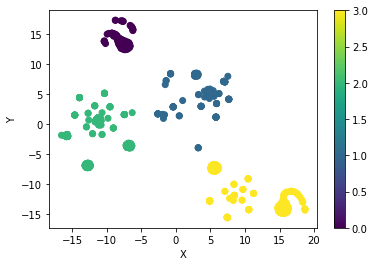

In [81]:
def show_clusters(df):
    plt.scatter(df["ColumnOne"], df["ColumnTwo"], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    

show_clusters(clusters)

# Conclusion

- After dimensionality reduction and cluster analysis we can conclude that the cryptocurrencies be clustered togethe and there would be four clusters to be displayed the most of intercia. 